In [3]:
import csv
import random, math, sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [4]:
def read_dataset(file_name):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 0:
                elements = []
                for r in row:
                    elements.append(float(r))
            data.append(elements)
    return data

In [5]:
def select_prior_leaders(c, data):
    v = []
    for i in range(c):
        index = random.randint(0,len(data))
        v.append(data[index])
    return v


In [6]:
def distance(x, v):
    s = 0
    for i, j in zip(x, v):
        s += (i-j)**2
    return math.sqrt(s)

In [7]:
def belonging(xk, vi, v):
    c = len(v)
    sigma = 0
    for j in range(c):
        if distance(xk, v[j]) == 0.0:
            return 0
        if distance(xk, vi) == 0.0:
            return 1
        sigma += (distance(xk, vi)/(distance(xk, v[j])))**(2/(m-1))
    return 1/ sigma

In [8]:
def weighted_average(data, vi, v):
    c = len(v)
    sigma_nominator = np.array([0.0]*len(data[0]))
    sigma_denominator = 0.0
    for x in data:
        sigma_nominator = np.add(((belonging(x, vi, v)**m)*np.array(x)), sigma_nominator) 
        sigma_denominator += belonging(x, vi, v)**m
    return sigma_nominator/sigma_denominator


In [9]:
def update_leaders(c, v, data):
    for i in range(c):
        v[i] = weighted_average(data, v[i], v)
    return v

In [10]:
def cost(data, v):
    J = 0
    c = len(v)
    for x in data:
        for i in range(c):
            J += (belonging(x, v[i], v)**m) * distance(x, v[i])
    return J

In [11]:
def train(file_name, C, m, epochs):
    data = read_dataset(file_name)
    cost_list = []
    for c in range(1, C+1):
        updated_leaders = select_prior_leaders(c, data)
        for i in range(epochs):
            updated_leaders = update_leaders(c, updated_leaders, data)
        cost_list.append(cost(data, updated_leaders))
    return cost_list, updated_leaders, data

def cost_plt(file_name, C, m, epochs, color):
    cost_list, updated_leaders, data = train(file_name, C, m, epochs)
    plt.plot(range(1, C+1), cost_list, color=color)
    print(file_name)
    plt.show()
    return cost_list, updated_leaders, data

In [15]:
def colorful_plt(C, m, epochs, updated_leaders, data):
    belongings_list = []
   
    X = []
    Y = []
    X_leaders = []
    Y_leaders = []
    for x in data:
        b = []
        for leader in updated_leaders:
            b.append(belonging(x, leader, updated_leaders))
            X_leaders.append(leader[0])
            Y_leaders.append(leader[1])
        belongings_list.append(b.index(max(b)))
        X.append(x[0])
        Y.append(x[1])
    belongings_list = np.array(belongings_list)

    colors = matplotlib.cm.rainbow(np.linspace(0, 1, C))

    colormap = matplotlib.colors.ListedColormap(colors)

    plt.scatter(X, Y, c=belongings_list, cmap=colormap)
    plt.scatter(X_leaders,Y_leaders,marker= ",", color='black')
    plt.show() 

In [26]:
def gradient_colorful_plt(C, m, epochs, updated_leaders, data):
    belongings_list = []
    w = []
    for i in range(C):
        w.append(i+10)
    X = []
    Y = []
    X_leaders = []
    Y_leaders = []
    colors = []
    for x in data:
        b = []
        for leader in updated_leaders:
            b.append(belonging(x, leader, updated_leaders))
            X_leaders.append(leader[0])
            Y_leaders.append(leader[1])
        colors.append(np.dot(np.array(b), np.array(w)))
        X.append(x[0])
        Y.append(x[1])


    plt.scatter(X, Y, c=colors)
    plt.scatter(X_leaders,Y_leaders,marker= ",", color='black')
    plt.show() 

data1.csv


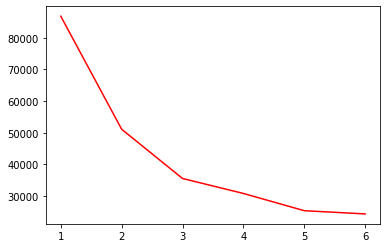

data2.csv


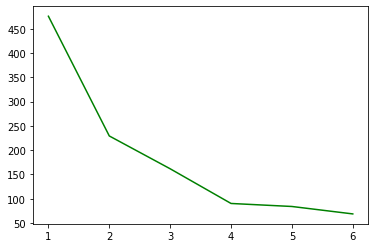

data3.csv


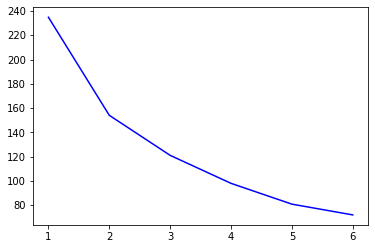

data4.csv


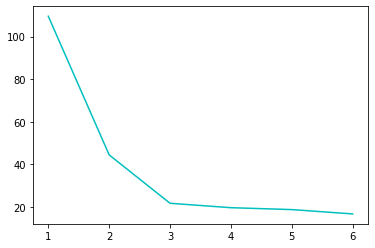

In [120]:
m = 1.5
epochs = 100
C = 6
colors = ['r','g','b','c']
for i in range(1, 5):
    cost_plt(f"data{i}.csv", C, m, epochs, colors[i-1])

According to the results we get that there is a suitable number for the number of clusters for each of the datasets:<br>
Suitable #clusters for Dataset 1: 3<br>
Suitable #clusters for Dataset 2: 4<br>
Suitable #clusters for Dataset 3: 4<br>
Suitable #clusters for Dataset 4: 3

m = 1.05
data1.csv


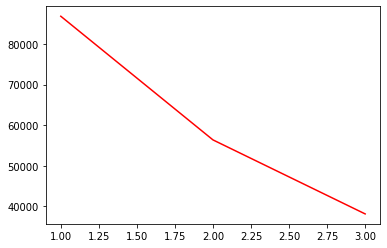

[array([459.47580506, 360.86521047]), array([208.73749782, 234.19967255]), array([481.41050393, 116.4207052 ])]


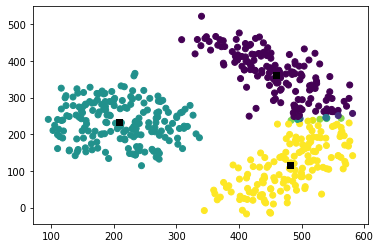

m = 2
data1.csv


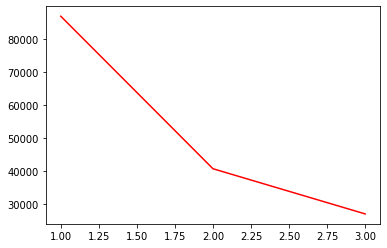

[array([203.16094823, 235.84863987]), array([479.11160772, 116.9167464 ]), array([453.47562461, 364.78441397])]


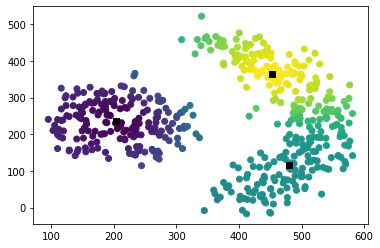

m = 4
data1.csv


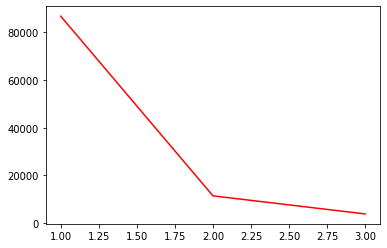

[array([206.70489997, 235.76575724]), array([476.03799842, 127.23762037]), array([450.10801678, 356.83246116])]


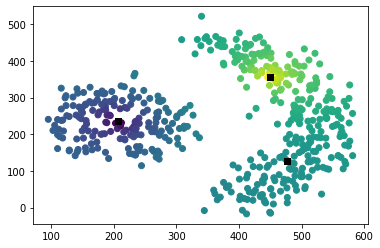

m = 6
data1.csv


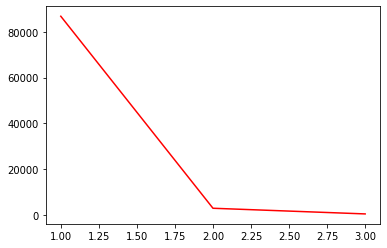

[array([449.11092545, 351.08259242]), array([472.76850677, 134.34538312]), array([212.09442681, 233.73143245])]


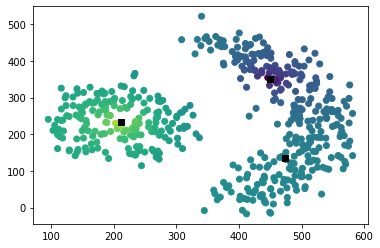

m = 10
data1.csv


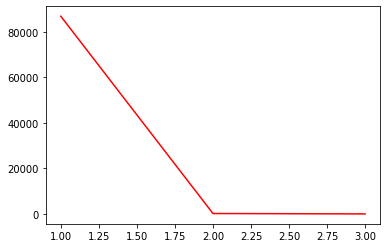

[array([448.00475151, 344.37894456]), array([468.67840882, 139.26479627]), array([217.74041822, 232.84981457])]


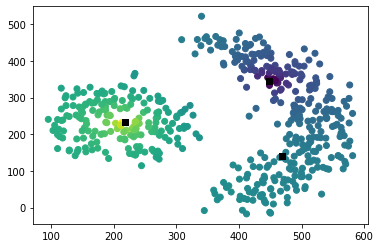

In [27]:
epochs = 100
C = 3

m_list = [1.05, 2, 4, 6, 10]
for m in m_list:
    print(f"m = {m}")
    cost_list, updated_leaders, data = cost_plt('data1.csv', C, m, epochs, 'r')
    print(updated_leaders)
    gradient_colorful_plt(C, m, epochs, updated_leaders=updated_leaders, data=data)

According to the plottings above by increasing parameter m, the cost decreases at a greater speed and converges to 0 much faster.<br>
By increasing the parameter "m" the fuzzy-ness of the data increases and their belonging to different clusters becomes more accurate and the borders of the clusters becomes smoother.<br>
Also there is a change in the leaders of clusters each time in a way to be more representative of their clusters.


data3.csv


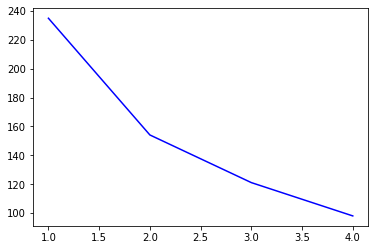

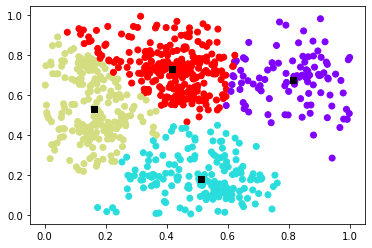

In [122]:
m = 1.5
epochs = 100
C = 4
cost_list, updated_leaders, data = cost_plt('data3.csv', C, m, epochs, 'b')
colorful_plt(C, m, epochs, updated_leaders=updated_leaders, data=data)

data1.csv


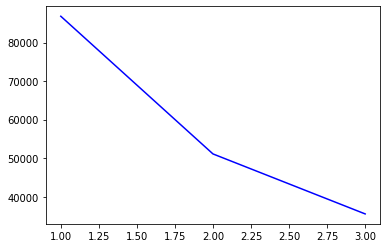

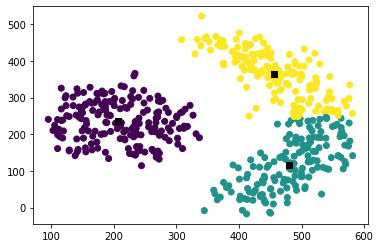

In [21]:
m = 1.5
epochs = 100
C = 3
cost_list, updated_leaders, data = cost_plt('data1.csv', C, m, epochs, 'b')
colorful_plt(C, m, epochs, updated_leaders=updated_leaders, data=data)